In [1]:
#Importation
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [2]:
# Charger les données
df = pd.read_csv("/content/Breast_Cancer.csv")
df.head()


,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
# Afficher les statistiques de base
print("Informations sur le dataset:")
df.info()
print("\nStatistiques descriptives:")
print(df.describe())
print(df.shape)


Informations sur le dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         402

In [4]:
# Vérifier les valeurs manquantes
print("\nValeurs manquantes:")
print(df.isnull().sum())


Valeurs manquantes:
Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64


In [6]:
#suppression des duplication
df_clean = df.drop_duplicates()


In [7]:
#Nombre de lignes et colonnes après nettoyage
print(df_clean.shape)


(4023, 16)


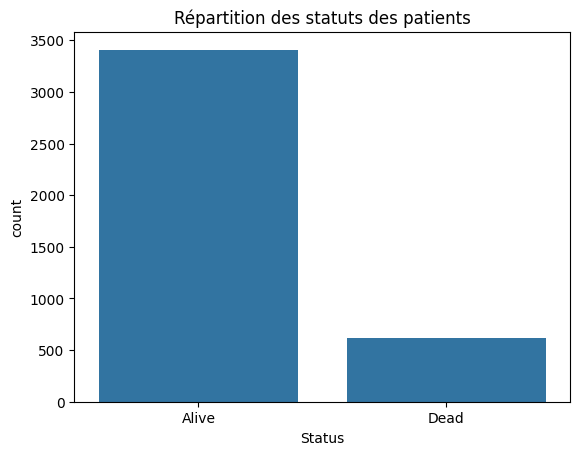

In [8]:
# Visualisation de la répartition de la variable cible
sns.countplot(x='Status', data=df)
plt.title("Répartition des statuts des patients")
plt.show()


In [9]:
# Encodage des variables catégoriques(rendre les données lisibles et utilisables par les modèles.)
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


In [10]:
# Séparation des données
X = df.drop(columns=['Status'])
y = df['Status']

In [11]:
# Équilibrage du dataset avec SMOTE Synthetic Minority Over-sampling Technique
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

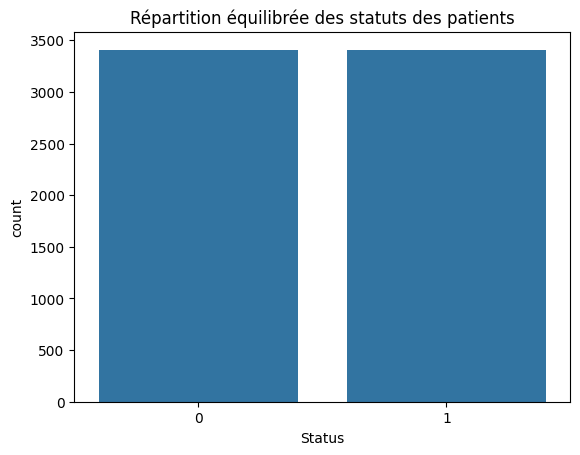

In [12]:
# Nouvelle distribution des classes après équilibrage
sns.countplot(x=y_resampled)
plt.title("Répartition équilibrée des statuts des patients")
plt.show()

In [13]:
# Séparation des données en train et test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [14]:
# Entraînement du modèle Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Prédictions
y_pred = model.predict(X_test)

In [16]:
# Évaluation du modèle
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9171554252199413

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       679
           1       0.92      0.91      0.92       685

    accuracy                           0.92      1364
   macro avg       0.92      0.92      0.92      1364
weighted avg       0.92      0.92      0.92      1364



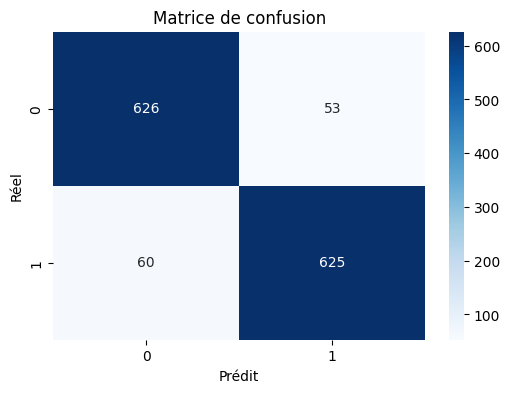

In [17]:
# Matrice de confusion #évaluer les performances d'un modéle binaire ou multiclasses
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()


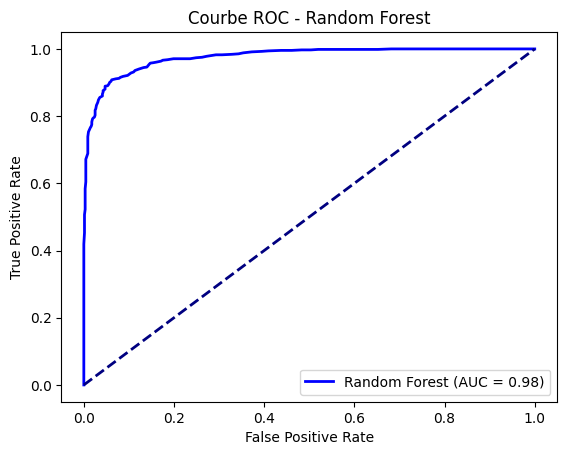

In [18]:
# Prédiction des probabilités pour calculer la courbe ROC
y_proba_rf = model.predict_proba(X_test)[:, 1]

# Calcul des points ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Affichage de la courbe ROC
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Random Forest')
plt.legend(loc="lower right")
plt.show()


 **Régression logistique**


In [19]:
from sklearn.linear_model import LogisticRegression

# Création et entraînement du modèle de régression logistique
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [20]:
# Prédictions
y_pred_log = log_model.predict(X_test)

In [21]:
# Évaluation du modèle
print("=== Régression Logistique ===")
print("Accuracy :", accuracy_score(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_log))

=== Régression Logistique ===
Accuracy : 0.8079178885630498
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       679
           1       0.82      0.79      0.80       685

    accuracy                           0.81      1364
   macro avg       0.81      0.81      0.81      1364
weighted avg       0.81      0.81      0.81      1364

Matrice de confusion:
 [[562 117]
 [145 540]]


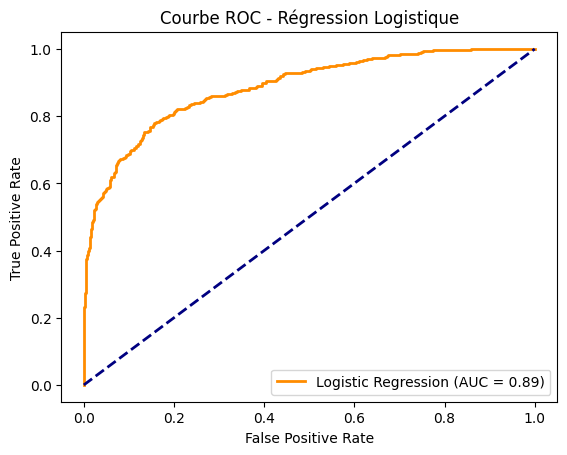

In [22]:
# Courbe ROC
fpr_log, tpr_log, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:, 1])
roc_auc_log = auc(fpr_log, tpr_log)

plt.figure()
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Régression Logistique')
plt.legend(loc="lower right")
plt.show()

# **KNN : K-Nearest Neighbors**

In [23]:
from sklearn.neighbors import KNeighborsClassifier
# Création et entraînement du modèle KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [24]:
# Prédictions
y_pred_knn = knn_model.predict(X_test)


In [25]:
# Évaluation du modèle
print("=== K-Nearest Neighbors ===")
print("Accuracy :", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_knn))

=== K-Nearest Neighbors ===
Accuracy : 0.8687683284457478
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.78      0.86       679
           1       0.81      0.96      0.88       685

    accuracy                           0.87      1364
   macro avg       0.88      0.87      0.87      1364
weighted avg       0.88      0.87      0.87      1364

Matrice de confusion:
 [[528 151]
 [ 28 657]]


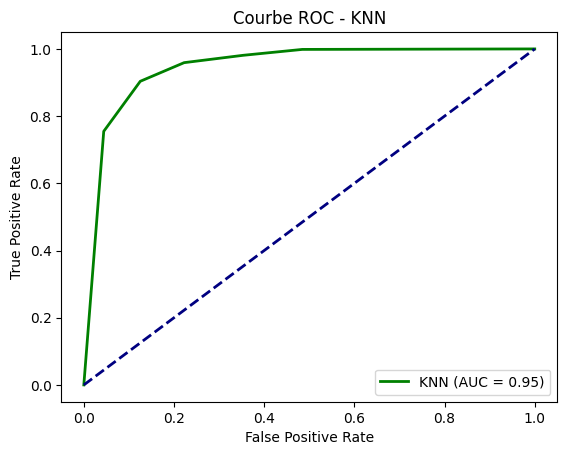

In [26]:
# Courbe ROC
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:, 1])
roc_auc_knn = auc(fpr_knn, tpr_knn)

plt.figure()
plt.plot(fpr_knn, tpr_knn, color='green', lw=2, label='KNN (AUC = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - KNN')
plt.legend(loc="lower right")
plt.show()


#  SVM : Support Vector Machine

In [27]:
from sklearn.svm import SVC

# Création et entraînement du modèle SVM
svm_model = SVC(kernel='rbf', probability=True, random_state=42)  #
svm_model.fit(X_train, y_train)


SVC(probability=True, random_state=42)

In [28]:
# Prédictions
y_pred_svm = svm_model.predict(X_test)

In [29]:
# Évaluation du modèle
print("=== Support Vector Machine (SVM) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Matrice de confusion:\n", confusion_matrix(y_test, y_pred_svm))

=== Support Vector Machine (SVM) ===
Accuracy : 0.7939882697947214
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       679
           1       0.86      0.71      0.78       685

    accuracy                           0.79      1364
   macro avg       0.80      0.79      0.79      1364
weighted avg       0.80      0.79      0.79      1364

Matrice de confusion:
 [[599  80]
 [201 484]]


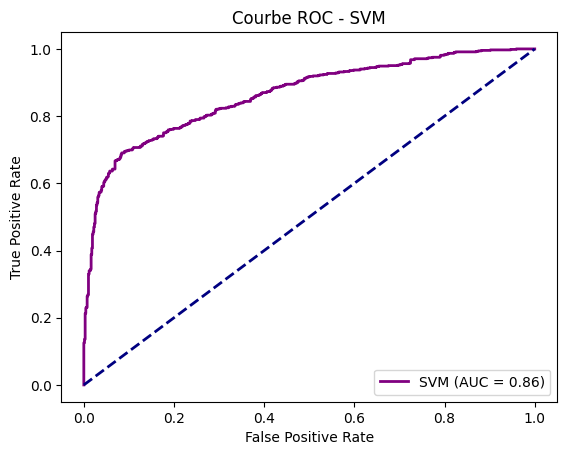

In [30]:
# Courbe ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])
roc_auc_svm = auc(fpr_svm, tpr_svm)

plt.figure()
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label='SVM (AUC = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - SVM')
plt.legend(loc="lower right")
plt.show()

# Decision Tree


=== Decision Tree Classifier ===
Accuracy:  0.8600
Precision: 0.8559
Recall:    0.8672
F1-score:  0.8615
AUC:       0.8599

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86       679
           1       0.86      0.87      0.86       685

    accuracy                           0.86      1364
   macro avg       0.86      0.86      0.86      1364
weighted avg       0.86      0.86      0.86      1364



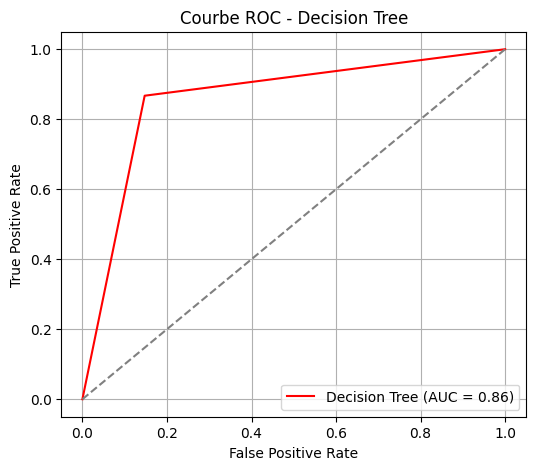

In [37]:
# 1. Entraînement du modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Prédictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# 3. Évaluation
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

print("=== Decision Tree Classifier ===")
print(f"Accuracy:  {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall:    {recall_dt:.4f}")
print(f"F1-score:  {f1_dt:.4f}")
print(f"AUC:       {auc_dt:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))

# Tracé de la courbe ROC
plt.figure(figsize=(6, 5))
plt.plot(fpr_dt, tpr_dt, color='red', label='Decision Tree (AUC = %0.2f)' % auc_dt)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC - Decision Tree')
plt.legend(loc='lower right')
plt.grid()
plt.show()




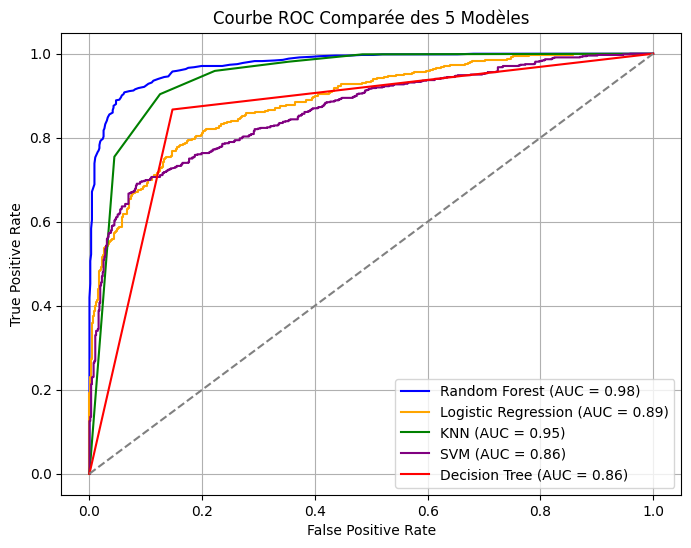

In [36]:
# Ajout des probabilités pour le modèle Decision Tree
y_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Courbe ROC et AUC pour le Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Affichage avec 5 courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = %0.2f)' % auc_rf, color='blue')
plt.plot(fpr_log, tpr_log, label='Logistic Regression (AUC = %0.2f)' % auc_log, color='orange')
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = %0.2f)' % auc_knn, color='green')
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm, color='purple')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = %0.2f)' % auc_dt, color='red')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Courbe ROC Comparée des 5 Modèles')
plt.legend(loc='lower right')
plt.grid()
plt.show()


In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Création et entraînement du modèle Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Dictionnaire des modèles (mise à jour avec Decision Tree)
models = {
    'Random Forest': model,
    'Logistic Regression': log_model,
    'KNN': knn_model,
    'SVM': svm_model,
    'Decision Tree': dt_model
}

# Initialisation du tableau
results = []

# Boucle sur chaque modèle
for name, clf in models.items():
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1])

# Affichage en DataFrame
import pandas as pd

results_df = pd.DataFrame(results, columns=['Modèle', 'Accuracy', 'Precision', 'Recall', 'F1-score'])
print(results_df)


                Modèle  Accuracy  Precision    Recall  F1-score
0        Random Forest  0.917155   0.921829  0.912409  0.917095
1  Logistic Regression  0.807918   0.821918  0.788321  0.804769
2                  KNN  0.868768   0.813119  0.959124  0.880107
3                  SVM  0.793988   0.858156  0.706569  0.775020
4        Decision Tree  0.859971   0.855908  0.867153  0.861494
